<a href="https://colab.research.google.com/github/ketankumud/Deep-Learning-Transfer-Learning/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from tensorflow import keras

In [4]:
import tensorflow as tfb

In [5]:
import tensorflow_datasets as tfds

In [6]:
datasets,info=tfds.load("tf_flowers", as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [7]:
info.splits

{'train': <SplitInfo num_examples=3670, num_shards=2>}

In [9]:
class_names=info.features["label"].names
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [11]:
n_class=info.features["label"].num_classes
n_class

5

In [13]:
dataset_size = info.splits["train"].num_examples
dataset_size

3670

In [22]:
# Split data

test_data,valid_set,train_set=tfds.load("tf_flowers",split=["train[:10%]","train[10%:25%]","train[25%:]"],as_supervised=True)


In [15]:
import matplotlib.pyplot as plt


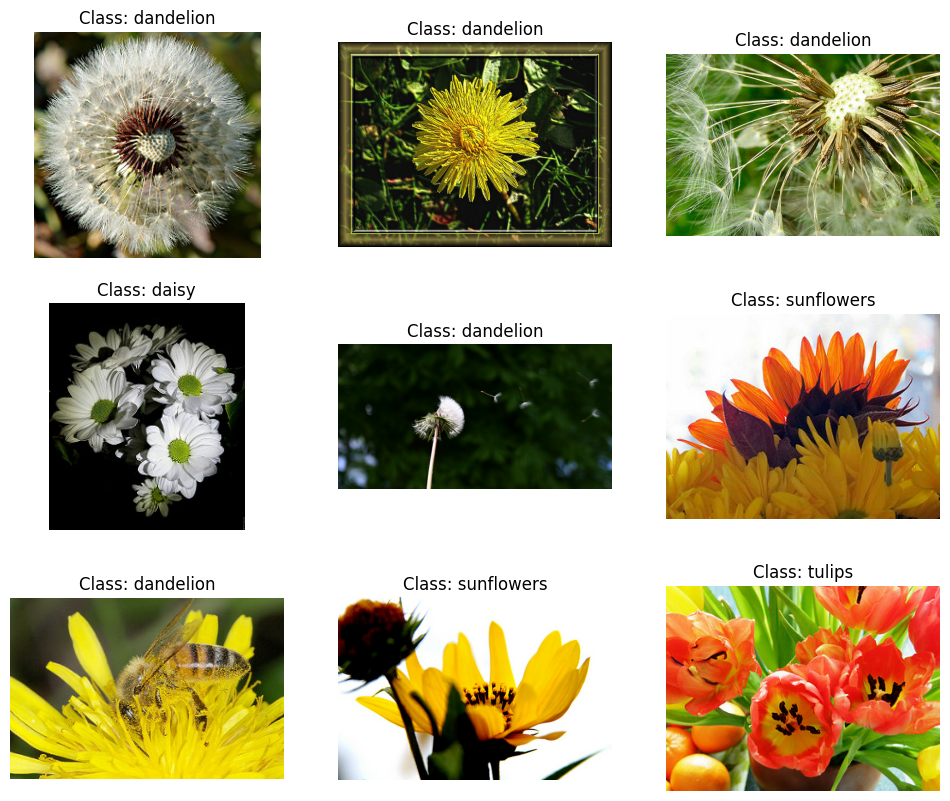

In [16]:
plt.figure(figsize=(12, 10))

index=0

for image,label in train_set.take(9):
  index+=1
  plt.subplot(3,3,index)
  plt.imshow(image)
  plt.title("Class: {}".format(class_names[label]))  
  plt.axis("off")
plt.show()


In [18]:
# Basic Preprocessing

def preprocess(image,label):
  resize_image=tfb.image.resize(image,[224,224])
  final_image=keras.applications.xception.preprocess_input(resize_image)
  return final_image,label


In [23]:
batch_size=32
train_set=train_set.shuffle(1000).repeat()
train_set=train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set=valid_set.map(preprocess).batch(batch_size).prefetch(1)
test_set=test_data.map(preprocess).batch(batch_size).prefetch(1)

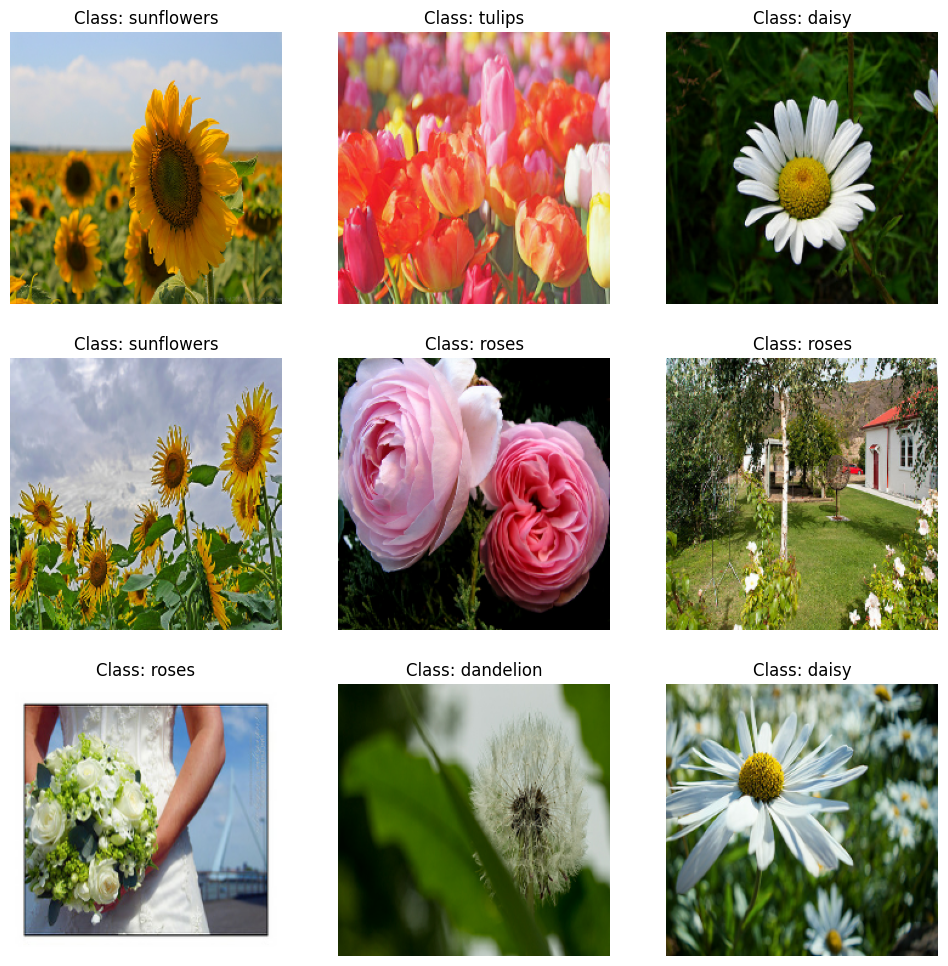

In [24]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

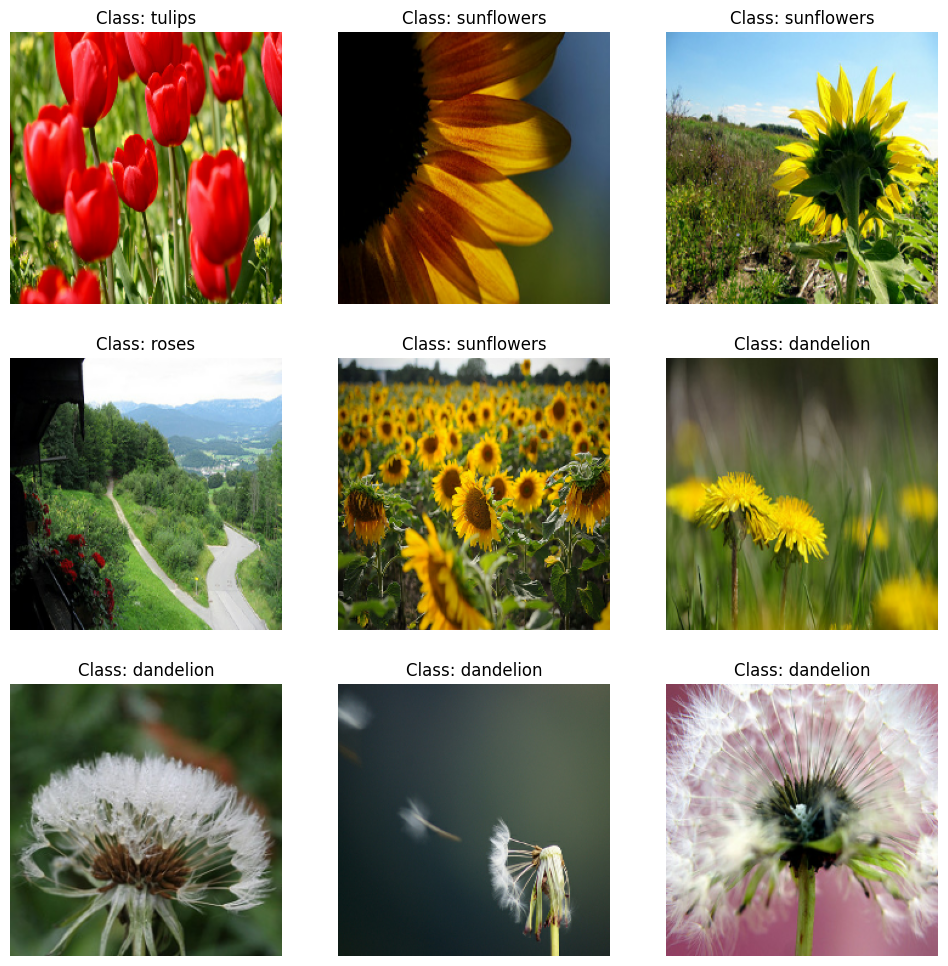

In [25]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in test_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

In [27]:
# implement model

base_model=keras.applications.xception.Xception(weights="imagenet",include_top=False)

avg_pool=keras.layers.GlobalAveragePooling2D()(base_model.output)
output=keras.layers.Dense(n_class,activation="softmax")(avg_pool)

model=keras.models.Model(inputs=base_model.input,outputs=output)

In [28]:
for index, layer in enumerate(base_model.layers):
    print(index, layer.name)

0 input_2
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_4
13 block2_pool
14 batch_normalization_4
15 add_12
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_5
23 block3_pool
24 batch_normalization_5
25 add_13
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_6
33 block4_pool
34 batch_normalization_6
35 add_14
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_15
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_se

In [30]:
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss="sparse_categorical_crossentropy",optimizer=
              keras.optimizers.SGD(learning_rate=0.2,momentum=0.9),metrics=["accuracy"])

history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Epoch 1/5
86/86 [==============================] - 481s 6s/step - loss: 1.4879 - accuracy: 0.7911 - val_loss: 1.7075 - val_accuracy: 0.8107
Epoch 2/5
86/86 [==============================] - 473s 6s/step - loss: 0.8303 - accuracy: 0.8834 - val_loss: 1.0818 - val_accuracy: 0.8585
Epoch 3/5
86/86 [==============================] - 469s 5s/step - loss: 0.5616 - accuracy: 0.9153 - val_loss: 2.4481 - val_accuracy: 0.7721
Epoch 4/5
86/86 [==============================] - 468s 5s/step - loss: 0.3829 - accuracy: 0.9375 - val_loss: 1.2519 - val_accuracy: 0.8676
Epoch 5/5
86/86 [==============================] - 469s 5s/step - loss: 0.1981 - accuracy: 0.9560 - val_loss: 1.3155 - val_accuracy: 0.8493
